<a href="https://colab.research.google.com/github/prachi2810/ColorDetection/blob/main/Image_Compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#  coefficient quantization matrix
#  You can decide this by yourself.
quantization = [[5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5],
                [5, 5, 5, 5, 5, 5, 5, 5]]

In [ ]:
# Forward DCT (8 × 8）
# The image need to be divided into 8×8 blocks firstly, and then transform each image subblock into DCT domain.
# For each image subblock in DCT domain, the coefficient in the location (0, 0) is the DC coefficient, others are AC coefficients.

def dct(img):
    img_data = img.astype(float)
    m, n = img_data.shape
    img_dct = np.zeros(img.shape)
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)

    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_dct[window_x_s:window_x, window_y_s:window_y] = cv2.dct(img_data[window_x_s:window_x,window_y_s:window_y]) / quantization
    return img_dct

In [ ]:
# Inverse DCT of image (for each 8×8 block)

def idct(img_dct):
    img_re = np.zeros(img_dct.shape)
    m,n = img_dct.shape
    x_batchsize = int(m/8)
    y_batchsize = int(n/8)
    for i in range(0,x_batchsize):
        for j in range(0,y_batchsize):
            window_x_s = i * 8
            window_x = (i+1) * 8
            window_y_s = j * 8
            window_y = (j+1) * 8
            img_re[window_x_s:window_x,window_y_s:window_y] = cv2.idct(img_dct[window_x_s:window_x, window_y_s:window_y]) * quantization
    return img_re    

In [ ]:
if __name__ == "__main__":

    print("Begin to calculate")

    # load the process image
    img = cv2.imread('/content/lena.jpg', 0)

    # DCT
    img_dct = dct(img)

    # IDCT
    img_re = idct(img_dct)

Begin to calculate


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

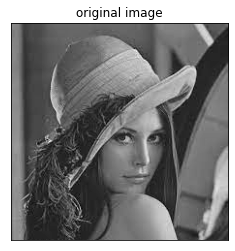

In [ ]:
    # show all images
    plt.imshow(img, 'gray')
    plt.title('original image')
    plt.xticks([]), plt.yticks([])

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

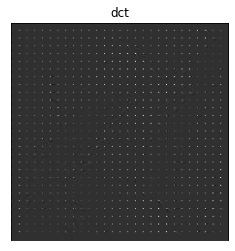

In [ ]:
plt.imshow(img_dct, 'gray')
plt.title('dct')
plt.xticks([]), plt.yticks([])

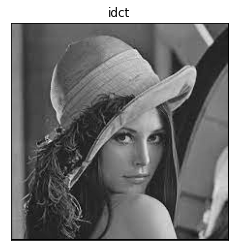

In [ ]:
plt.imshow(img_re, 'gray')
plt.title('idct') #Compression ratio is nearly equal to 1 KB
plt.xticks([]), plt.yticks([])
plt.show()